# Исследование объявлений о продаже квартир

В нашем распоряжении архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Определять параметры, влияющие на рыночную стоимость объектов недвижимости. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a>

## Изучение данных из файла

In [1]:
import pandas as pd
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


### Вывод

Открыл датафрейм. Данные склеены в одну строку, распределены не по колонкам. Данные разделеные через \t. Данные можно раздедить через параметр sep. Во всём датафрейме лучше перевести в формат целого числа колонки со стоимостью, количество балконов, колонки с ближайшими аэропортами, паркими и озерами, а также их количеством и количество дней выставления на продажу. Следует также обработать формат даты публикации объявления о продаже недвижимости. В датафрэйме нет отрицательных значений (просмотрел через функцию query каждый столбец кроме тех, что bool). В колонке locality_name встречаются дубликаты (напр, поселок, посёлок), необходимо убрать вид населенного пункта, оставить только его название.

## Предобработка данных

In [2]:
data = data.rename(columns={'cityCenters_nearest':'city_centres_nearest', 'parks_around3000':'parks_around_3000', 'ponds_around3000':'ponds_around_3000'})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
city_centres_nearest    18180 non-null float64
parks_around_3000       18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around_30

Следует переименовать некоторые колонки

In [3]:
floors_nan = data[data['floors_total'].isna()]
floor = floors_nan['floor'].unique()
def floors(set):
    for value in floor:
        data.loc[(data['floors_total'].isna()) & (data['floor'] == value), 'floors_total'] = value
    return data

floors(data)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23699 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
city_centres_nearest    18180 non-null float64
parks_around_3000       18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around_30

По колонкам заполняем пропущенные значения. Сначала заполним пропуски в floors_total. Выведем на экран пропуски в floors_total, затем отберем уникальные значения из колонки floor и присвоим к пропуску в floors_total значение из floor. Напишем для этого функцию.

In [4]:
data['ceiling_height'] = data['ceiling_height'].fillna(data.groupby('floors_total')['ceiling_height'].transform('median'))
data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = data['ceiling_height'].median()
filter = (data['ceiling_height'] > 20) & (data['ceiling_height'] <= 35)
data.loc[filter, 'ceiling_height'] = data.loc[filter, 'ceiling_height']/10
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
city_centres_nearest    18180 non-null float64
parks_around_3000       18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around_30

С группировкой по floors_total заполняем пропуски в колонке ceiling_height медианным значением. Оставшиеся пропуски заполняем медианным значением по колонке ceiling_height

In [5]:
data.loc[data['is_apartment'].isna(), 'is_apartment'] = False
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
city_centres_nearest    18180 non-null float64
parks_around_3000       18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around_300

В колонке is_apartment проще всего заменить все пропуски на FALSE, так как это не самая часто встречающаяся недвижимость и те, кто обладают апартаментами, обычно знают о нюансах этого вида недвижимости.

In [6]:
data.loc[data['balcony'].isna(), 'balcony'] = 0
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
city_centres_nearest    18180 non-null float64
parks_around_3000       18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around_300

В колонке balcony пропуски будем заполнять "0", так как владельцы могли банально не указать их количество

In [7]:
data = data.dropna(subset=['locality_name']).reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23650 entries, 0 to 23649
Data columns (total 22 columns):
total_images            23650 non-null int64
last_price              23650 non-null float64
total_area              23650 non-null float64
first_day_exposition    23650 non-null object
rooms                   23650 non-null int64
ceiling_height          23650 non-null float64
floors_total            23650 non-null float64
living_area             21752 non-null float64
floor                   23650 non-null int64
is_apartment            23650 non-null bool
studio                  23650 non-null bool
open_plan               23650 non-null bool
kitchen_area            21381 non-null float64
balcony                 23650 non-null float64
locality_name           23650 non-null object
airports_nearest        18116 non-null float64
city_centres_nearest    18139 non-null float64
parks_around_3000       18140 non-null float64
parks_nearest           8064 non-null float64
ponds_around_300

In [8]:
data['locality_name'].unique()
def loc (set):
    for name in ['поселок ',
                'посёлок ',
                'городской посёлок ',
                'городской поселок ',
                'деревня ',
                'поселок городского типа ',
                'посёлок городского типа ',
                'садовое товарищество ',
                'садоводское некоммерческое товарищество ',
                'садоводческое некоммерческое товарищество ',
                'посёлок при железнодорожной станции ',
                'поселок при железнодорожной станции ',
                'коттеджный поселок ',
                'коттеджный посёлок ',
                'село ',
                ' городского типа',
                'городской ',
                ' имени',
                ' при железнодорожной станции ',
                'коттеджный  ']:
        data['locality_name'] = data['locality_name'].str.replace(name, '')
    return data

loc(data)
data['locality_name'].unique()


array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'городского типа Красный Бор', 'Гатчина',
       'Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'городского типа Лебяжье',
       'городского типа Сиверский', 'Молодцово',
       'городского типа Кузьмоловский', 'Новая Ропша', 'Павловск',
       'Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск',
       'Сестрорецк', 'Куттузи', 'Аннино', 'городского типа Ефимовский',
       'Плодовое', 'Заклинье', 'Торковичи', 'Первомайское',
       'Красное Село', 'Понтонный', 'Сясьстрой', 'Старая', 'Лесколово',
       'Новый Свет', 'Сланцы', 'Путилово', 'Ивангород', 'Шлиссельбург',
       'Никольское', 'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино',
       'Романовка', 'Бугры', 'городского типа Рощино', 'Кириши', 'Луга',
       'Волосово', 'Отрадное', 'Павлово', 'Оредеж', 'Копор

В колонке locality_name убираем строки, где нет названия населенного пункта. Также встречаются неявные дубликаты (напр, поселок, посёлок), необходимо убрать вид населенного пункта, оставить только его название. Для начала необходимо понять, какие виды населенных пунктов у нас представлены. При написании функции столкнулся с проблемой, что не всегда убирался вид населённого пункта полность, приходилось дорабатывать функцию

In [9]:
data['airports_nearest'] = data['airports_nearest'].fillna(data.groupby('locality_name')['airports_nearest'].transform('median'))
data.loc[data['airports_nearest'].isna(), 'airports_nearest'] = data['airports_nearest'].median()
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23650 entries, 0 to 23649
Data columns (total 22 columns):
total_images            23650 non-null int64
last_price              23650 non-null float64
total_area              23650 non-null float64
first_day_exposition    23650 non-null object
rooms                   23650 non-null int64
ceiling_height          23650 non-null float64
floors_total            23650 non-null float64
living_area             21752 non-null float64
floor                   23650 non-null int64
is_apartment            23650 non-null bool
studio                  23650 non-null bool
open_plan               23650 non-null bool
kitchen_area            21381 non-null float64
balcony                 23650 non-null float64
locality_name           23650 non-null object
airports_nearest        23650 non-null float64
city_centres_nearest    18139 non-null float64
parks_around_3000       18140 non-null float64
parks_nearest           8064 non-null float64
ponds_around_300

Далее беремся за обработку колонки airports_nearest. Заполняем пропуски медианой с группировкой по locality_name, а те данные, что нельзя заполнить с группировкой по населнному пункту, заполняем глобальной медианой

In [10]:
data['city_centres_nearest'] = data['city_centres_nearest'].fillna(data.groupby('locality_name')['city_centres_nearest'].transform('median'))
data.loc[data['city_centres_nearest'].isna(), 'city_centres_nearest'] = data['city_centres_nearest'].median()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23650 entries, 0 to 23649
Data columns (total 22 columns):
total_images            23650 non-null int64
last_price              23650 non-null float64
total_area              23650 non-null float64
first_day_exposition    23650 non-null object
rooms                   23650 non-null int64
ceiling_height          23650 non-null float64
floors_total            23650 non-null float64
living_area             21752 non-null float64
floor                   23650 non-null int64
is_apartment            23650 non-null bool
studio                  23650 non-null bool
open_plan               23650 non-null bool
kitchen_area            21381 non-null float64
balcony                 23650 non-null float64
locality_name           23650 non-null object
airports_nearest        23650 non-null float64
city_centres_nearest    23650 non-null float64
parks_around_3000       18140 non-null float64
parks_nearest           8064 non-null float64
ponds_around_300

Далее беремся за обработку колонку city_centres_nearest. Прицип действия такой же, как и с airports_nearest

In [11]:
data['parks_nearest'] = data['parks_nearest'].fillna(data.groupby('locality_name')['parks_nearest'].transform('median'))
data.loc[data['parks_nearest'].isna(), 'parks_nearest'] = data['parks_nearest'].median()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23650 entries, 0 to 23649
Data columns (total 22 columns):
total_images            23650 non-null int64
last_price              23650 non-null float64
total_area              23650 non-null float64
first_day_exposition    23650 non-null object
rooms                   23650 non-null int64
ceiling_height          23650 non-null float64
floors_total            23650 non-null float64
living_area             21752 non-null float64
floor                   23650 non-null int64
is_apartment            23650 non-null bool
studio                  23650 non-null bool
open_plan               23650 non-null bool
kitchen_area            21381 non-null float64
balcony                 23650 non-null float64
locality_name           23650 non-null object
airports_nearest        23650 non-null float64
city_centres_nearest    23650 non-null float64
parks_around_3000       18140 non-null float64
parks_nearest           23650 non-null float64
ponds_around_30

Далее беремся за обработку колонку parks_nearest. Прицип действия такой же, как и с airports_nearest

In [12]:
data['ponds_nearest'] = data['ponds_nearest'].fillna(data.groupby('locality_name')['ponds_nearest'].transform('median'))
data.loc[data['ponds_nearest'].isna(), 'ponds_nearest'] = data['ponds_nearest'].median()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23650 entries, 0 to 23649
Data columns (total 22 columns):
total_images            23650 non-null int64
last_price              23650 non-null float64
total_area              23650 non-null float64
first_day_exposition    23650 non-null object
rooms                   23650 non-null int64
ceiling_height          23650 non-null float64
floors_total            23650 non-null float64
living_area             21752 non-null float64
floor                   23650 non-null int64
is_apartment            23650 non-null bool
studio                  23650 non-null bool
open_plan               23650 non-null bool
kitchen_area            21381 non-null float64
balcony                 23650 non-null float64
locality_name           23650 non-null object
airports_nearest        23650 non-null float64
city_centres_nearest    23650 non-null float64
parks_around_3000       18140 non-null float64
parks_nearest           23650 non-null float64
ponds_around_30

Далее беремся за обработку колонку ponds_nearest. Прицип действия такой же, как и с airports_nearest

In [13]:
data['parks_around_3000'] = data['parks_around_3000'].fillna(data.groupby('locality_name')['parks_around_3000'].transform('median'))
data.loc[data['parks_around_3000'].isna(), 'parks_around_3000'] = data['parks_around_3000'].median()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23650 entries, 0 to 23649
Data columns (total 22 columns):
total_images            23650 non-null int64
last_price              23650 non-null float64
total_area              23650 non-null float64
first_day_exposition    23650 non-null object
rooms                   23650 non-null int64
ceiling_height          23650 non-null float64
floors_total            23650 non-null float64
living_area             21752 non-null float64
floor                   23650 non-null int64
is_apartment            23650 non-null bool
studio                  23650 non-null bool
open_plan               23650 non-null bool
kitchen_area            21381 non-null float64
balcony                 23650 non-null float64
locality_name           23650 non-null object
airports_nearest        23650 non-null float64
city_centres_nearest    23650 non-null float64
parks_around_3000       23650 non-null float64
parks_nearest           23650 non-null float64
ponds_around_30

Далее беремся за обработку колонку parks_around_3000. Прицип действия такой же, как и с airports_nearest

In [14]:
data['ponds_around_3000'] = data['ponds_around_3000'].fillna(data.groupby('locality_name')['ponds_around_3000'].transform('median'))
data.loc[data['ponds_around_3000'].isna(), 'ponds_around_3000'] = data['ponds_around_3000'].median()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23650 entries, 0 to 23649
Data columns (total 22 columns):
total_images            23650 non-null int64
last_price              23650 non-null float64
total_area              23650 non-null float64
first_day_exposition    23650 non-null object
rooms                   23650 non-null int64
ceiling_height          23650 non-null float64
floors_total            23650 non-null float64
living_area             21752 non-null float64
floor                   23650 non-null int64
is_apartment            23650 non-null bool
studio                  23650 non-null bool
open_plan               23650 non-null bool
kitchen_area            21381 non-null float64
balcony                 23650 non-null float64
locality_name           23650 non-null object
airports_nearest        23650 non-null float64
city_centres_nearest    23650 non-null float64
parks_around_3000       23650 non-null float64
parks_nearest           23650 non-null float64
ponds_around_30

Далее беремся за обработку колонку ponds_around_3000. Прицип действия такой же, как и с airports_nearest

In [15]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y.%m.%dT%H:%M:%S')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centres_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,2.75,11.0,18.6,1,False,...,11.0,2.0,Шушары,12817.0,18603.0,0.0,460.0,0.0,584.5,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.55,5.0,34.3,4,False,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,2.60,14.0,NaN,9,False,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Меняем формат числа и даты на привычный нам

In [16]:
data['floors_total'] = data['floors_total'].astype('int')
data['balcony'] = data['balcony'].astype('int')
data['parks_around_3000'] = data['parks_around_3000'].astype('int')
data['ponds_around_3000'] = data['ponds_around_3000'].astype('int')
data['last_price'] = data['last_price'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23650 entries, 0 to 23649
Data columns (total 22 columns):
total_images            23650 non-null int64
last_price              23650 non-null int64
total_area              23650 non-null float64
first_day_exposition    23650 non-null datetime64[ns]
rooms                   23650 non-null int64
ceiling_height          23650 non-null float64
floors_total            23650 non-null int64
living_area             21752 non-null float64
floor                   23650 non-null int64
is_apartment            23650 non-null bool
studio                  23650 non-null bool
open_plan               23650 non-null bool
kitchen_area            21381 non-null float64
balcony                 23650 non-null int64
locality_name           23650 non-null object
airports_nearest        23650 non-null float64
city_centres_nearest    23650 non-null float64
parks_around_3000       23650 non-null int64
parks_nearest           23650 non-null float64
ponds_around_30

Меняем формат данных в колонках floors_total, balcony, parks_around_3000, ponds_around_3000, last_price на int

## Расчёты и добавление результатов в таблицу

In [17]:
data['price_m3'] = data['last_price']/data['total_area']
data['price_m3'] = data['price_m3'].astype('int64')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centres_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_m3
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370
1,7,3350000,40.4,2018-12-04,1,2.75,11,18.6,1,False,...,2,Шушары,12817.0,18603.0,0,460.0,0,584.5,81.0,82920
2,10,5196000,56.0,2015-08-20,2,2.55,5,34.3,4,False,...,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785
3,0,64900000,159.0,2015-07-24,3,2.60,14,NaN,9,False,...,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000


Добавляем стоимость квадратного метра

In [18]:
data['week_d'] = data['first_day_exposition'].dt.weekday
def weekday (value):
    if value == 0:
        return 'Понедельник'
    elif value == 1:
        return 'Вторник'
    elif value == 2:
        return 'Среда'
    elif value == 3:
        return 'Четверг'
    elif value == 4:
        return 'Пятница'
    elif value == 5:
        return 'Суббота'
    else:
        return 'Воскресенье'
    
data['weekday_name'] = data['week_d'].apply(weekday)
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,city_centres_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_m3,week_d,weekday_name
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,18863.0,16028.0,1,482.0,2,755.0,NaN,120370,3,Четверг
1,7,3350000,40.40,2018-12-04,1,2.75,11,18.60,1,False,...,12817.0,18603.0,0,460.0,0,584.5,81.0,82920,1,Вторник
2,10,5196000,56.00,2015-08-20,2,2.55,5,34.30,4,False,...,21741.0,13933.0,1,90.0,2,574.0,558.0,92785,3,Четверг
3,0,64900000,159.00,2015-07-24,3,2.60,14,NaN,9,False,...,28098.0,6800.0,2,84.0,3,234.0,424.0,408176,4,Пятница
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,31856.0,8098.0,2,112.0,1,48.0,121.0,100000,1,Вторник
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,False,...,27223.0,13270.0,0,460.0,1,503.0,55.0,95065,0,Понедельник
6,6,3700000,37.30,2017-11-02,1,2.66,26,10.60,6,False,...,52996.0,19143.0,0,733.0,0,593.0,155.0,99195,3,Четверг
7,5,7915000,71.60,2019-04-18,2,2.75,24,NaN,22,False,...,23982.0,11634.0,0,460.0,0,503.0,NaN,110544,3,Четверг
8,20,2900000,33.16,2018-05-23,1,2.70,27,15.43,26,False,...,51553.0,21888.0,0,460.0,2,133.0,189.0,87454,2,Среда
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,50898.0,15008.0,0,460.0,0,503.0,289.0,88524,6,Воскресенье


In [19]:
data['month'] = data['first_day_exposition'].dt.month
def month_n (value):
    if value == 1:
        return 'Январь'
    elif value == 2:
        return 'Февраль'
    elif value == 3:
        return 'Март'
    elif value == 4:
        return 'Апрель'
    elif value == 5:
        return 'Май'
    elif value == 6:
        return 'Июнь'
    elif value == 7:
        return 'Июль'
    elif value == 8:
        return 'Август'
    elif value == 9:
        return 'Сентябрь'
    elif value == 10:
        return 'Октябрь'
    elif value == 11:
        return 'Ноябрь'
    else:
        return 'Декабрь'
    
data['month_name'] = data['month'].apply(month_n)
data.head()


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_m3,week_d,weekday_name,month,month_name
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,1,482.0,2,755.0,NaN,120370,3,Четверг,3,Март
1,7,3350000,40.4,2018-12-04,1,2.75,11,18.6,1,False,...,0,460.0,0,584.5,81.0,82920,1,Вторник,12,Декабрь
2,10,5196000,56.0,2015-08-20,2,2.55,5,34.3,4,False,...,1,90.0,2,574.0,558.0,92785,3,Четверг,8,Август
3,0,64900000,159.0,2015-07-24,3,2.60,14,NaN,9,False,...,2,84.0,3,234.0,424.0,408176,4,Пятница,7,Июль
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,2,112.0,1,48.0,121.0,100000,1,Вторник,6,Июнь


In [20]:
data['year'] = data['first_day_exposition'].dt.year
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_m3,week_d,weekday_name,month,month_name,year
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2,755.0,NaN,120370,3,Четверг,3,Март,2019
1,7,3350000,40.4,2018-12-04,1,2.75,11,18.6,1,False,...,460.0,0,584.5,81.0,82920,1,Вторник,12,Декабрь,2018
2,10,5196000,56.0,2015-08-20,2,2.55,5,34.3,4,False,...,90.0,2,574.0,558.0,92785,3,Четверг,8,Август,2015
3,0,64900000,159.0,2015-07-24,3,2.60,14,NaN,9,False,...,84.0,3,234.0,424.0,408176,4,Пятница,7,Июль,2015
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1,48.0,121.0,100000,1,Вторник,6,Июнь,2018


Добавляем день недели, месяц и год

In [21]:
def floor_category (value):
    if value['floor'] == 1:
        return 'Первый'
    elif value['floor'] == value['floors_total']:
        return 'Последний'
    else:
        return 'Другой'
        
data['floor_cat'] = data.apply(floor_category, axis = 1)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,price_m3,week_d,weekday_name,month,month_name,year,floor_cat
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,2,755.0,NaN,120370,3,Четверг,3,Март,2019,Другой
1,7,3350000,40.4,2018-12-04,1,2.75,11,18.6,1,False,...,0,584.5,81.0,82920,1,Вторник,12,Декабрь,2018,Первый
2,10,5196000,56.0,2015-08-20,2,2.55,5,34.3,4,False,...,2,574.0,558.0,92785,3,Четверг,8,Август,2015,Другой
3,0,64900000,159.0,2015-07-24,3,2.60,14,NaN,9,False,...,3,234.0,424.0,408176,4,Пятница,7,Июль,2015,Другой
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,1,48.0,121.0,100000,1,Вторник,6,Июнь,2018,Другой


In [22]:
(
    data.query('rooms == 0').
    pivot_table(index='total_area', values='rooms').
    sort_values(by='total_area', ascending=False)
)

,rooms
total_area,
371.0,0
98.4,0
73.6,0
71.0,0
58.4,0
...,...
18.8,0
18.0,0
17.0,0


In [23]:
data.loc[(data['rooms'] == 0) & (data['total_area'] < 35.0), 'rooms'] = 1
data.loc[(data['rooms'] == 0) & (data['total_area'] < 55.0), 'rooms'] = 2
data.loc[(data['rooms'] == 0) & (data['total_area'] < 70.0), 'rooms'] = 3
data.loc[(data['rooms'] == 0) & (data['total_area'] > 35.0), 'rooms'] = 4
data['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12])

Обрабатываем колонку rooms, необходимо избавиться от 0 в rooms. Заменить на 1 буде некорректно, так как невозможны ситуации, когда квартира 371 кв метр 1 комнатой. Возьмем нормативные показатели по площади для квартир с разным количеством комнат: 1-комнатная - до 35кв.м, 2-комнатная - до 55кв.м, 3-комнатная - до 70кв.м, 4-комнатная от 70кв.м и выше

Добавляем колонку с группировкой этажей (первый, последний, другой)

In [24]:
data['ratio_living'] = data['living_area']/data['total_area']
data['ratio_kitchen'] = data['kitchen_area']/data['total_area']
pivot_data = data.pivot_table(index='rooms', values=('ratio_living', 'ratio_kitchen'))
pivot_data

,ratio_kitchen,ratio_living
rooms,,
1,0.249899,0.490546
2,0.174138,0.579409
3,0.140924,0.625268
4,0.124006,0.646954
5,0.113455,0.641377
6,0.104150,0.668819
7,0.091932,0.657981
8,0.091708,0.667001
9,0.075054,0.612299


In [25]:
def living_area (row):
    return pivot_data.loc[row['rooms'], 'ratio_living']
def kitchen_area (row):
    return pivot_data.loc[row['rooms'], 'ratio_kitchen']
data.loc[data['living_area'].isna(), 'ratio_living'] = data.apply(living_area, axis=1)
data.loc[data['living_area'].isna(), 'living_area'] = data['total_area'] * data['ratio_living']
data.loc[data['kitchen_area'].isna(), 'ratio_kitchen'] = data.apply(kitchen_area, axis=1)
data.loc[data['kitchen_area'].isna(), 'kitchen_area'] = data['total_area'] * data['ratio_kitchen']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23650 entries, 0 to 23649
Data columns (total 31 columns):
total_images            23650 non-null int64
last_price              23650 non-null int64
total_area              23650 non-null float64
first_day_exposition    23650 non-null datetime64[ns]
rooms                   23650 non-null int64
ceiling_height          23650 non-null float64
floors_total            23650 non-null int64
living_area             23650 non-null float64
floor                   23650 non-null int64
is_apartment            23650 non-null bool
studio                  23650 non-null bool
open_plan               23650 non-null bool
kitchen_area            23650 non-null float64
balcony                 23650 non-null int64
locality_name           23650 non-null object
airports_nearest        23650 non-null float64
city_centres_nearest    23650 non-null float64
parks_around_3000       23650 non-null int64
parks_nearest           23650 non-null float64
ponds_around_30

Добавляем колонки с соотношением жилой площади к общей и кухни к общей площади. В сводной таблице получили сколько примерно приходится на жилую площадь и площадь кухни от общей площади квартиры. Пустые значения в ratio_living, ratio_kitchen заполним вычесленными в сводной таблице значениями исходя из количества комнат. А потом выясняем примерные значения в kitchen_area, living_area

## Исследовательский анализ данных

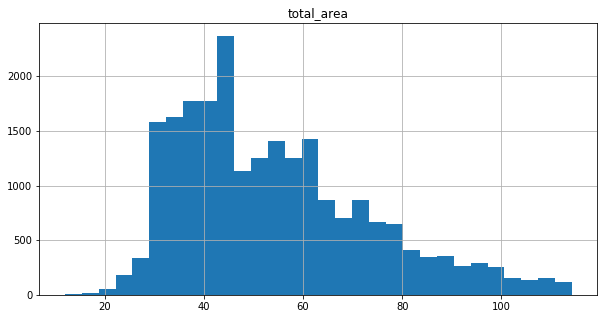

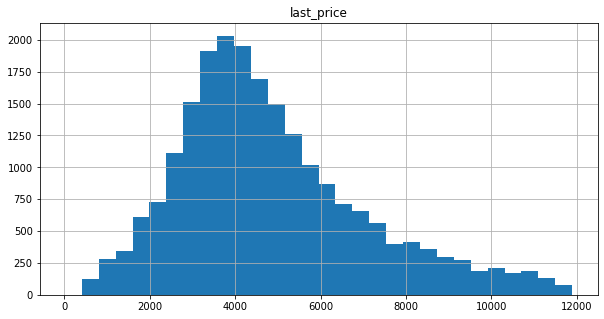

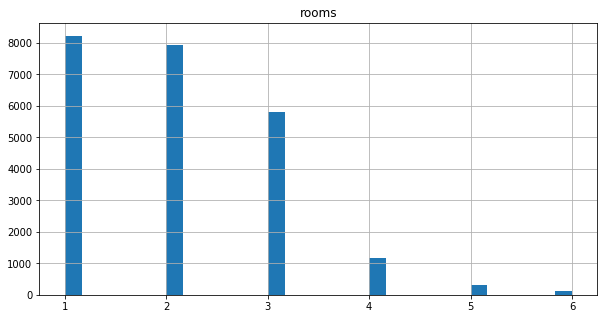

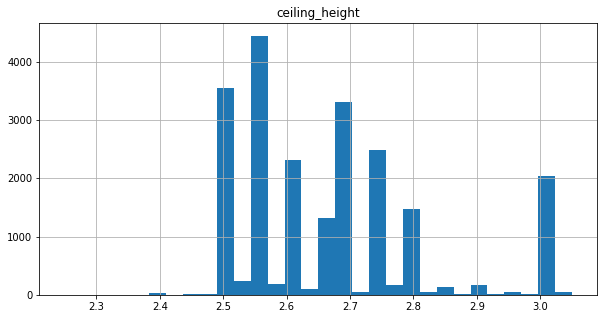

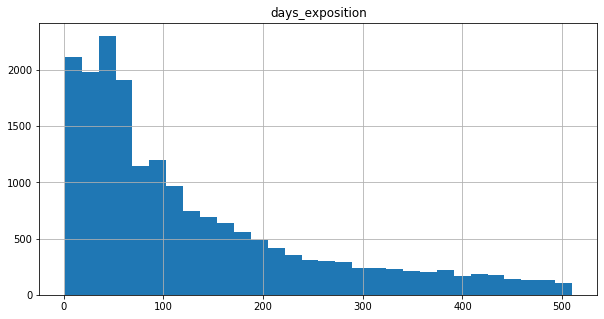

In [26]:
import matplotlib.pyplot as plt
data['last_price'] = data['last_price'] / 1000
for col in ['total_area', 'last_price', 'rooms', 'ceiling_height', 'days_exposition']:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    low = q1 - iqr * 1.5
    high = q3 + iqr * 1.5
    min_val = data[col].min()
    max_val = data[col].max()
    
    if min_val >= low:
        min = min_val
    else:
        min = low
    if max_val <= high:
        max = max_val
    else:
        max = high
    
    hist = data[col].hist(bins=30, figsize=(10,5), range=(min, max))
    hist.set_title(col)
    plt.show()

Строим гистограмы по параметрам общей площади, цены, числа комнат и высоты потолков и дней продажи

In [27]:
data['total_area'].describe()

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

In [28]:
data['last_price'].describe()

count     23650.000000
mean       6541.126898
std       10896.399175
min          12.190000
25%        3400.000000
50%        4650.000000
75%        6799.000000
max      763000.000000
Name: last_price, dtype: float64

In [29]:
data['rooms'].describe()

count    23650.000000
mean         2.079323
std          1.066426
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [30]:
data['ceiling_height'].describe()

count    23650.000000
mean         2.714762
std          0.697994
min          1.000000
25%          2.550000
50%          2.650000
75%          2.750000
max        100.000000
Name: ceiling_height, dtype: float64

In [31]:
data['days_exposition'].describe()

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Самая часто встречающаяся площадь - от 30 до 80 кв.м. Есть артефакты - более 350 кв.м. Распределение нормальное.

Самая часто встречающаяся стоимость квартир - 3-5 млн руб. Распределение нормальное.

Больше всего выставлены на продажу 1,2,3-комнатных квартиры. Артефакты - квартиры с комнатами больше 6. Распределение Пуассона

Чаще всего встречается высота потолков 2,5 м. Есть артефакты в 1 м и 100 м. Распределение Пуассона.

Продажа обычно занимает по медиане 95 дней, слишком долгие продажи занимают более 231 дня, самые быстрые - до 45 дней. Средняя продажа - 180 дней.

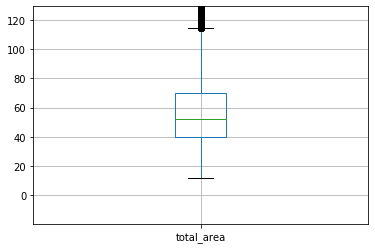

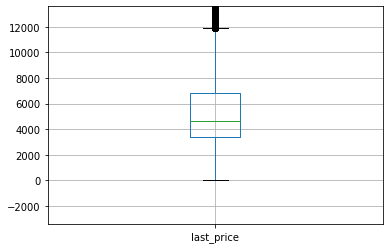

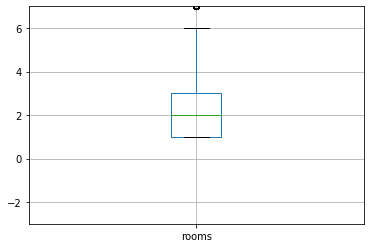

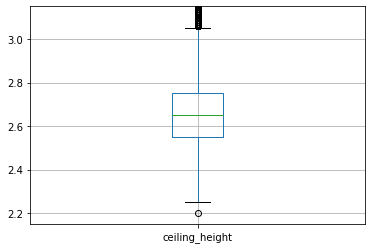

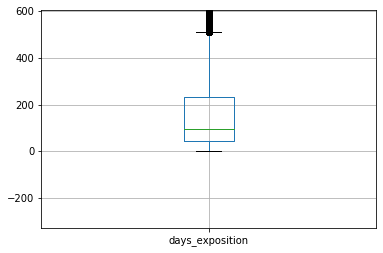

In [32]:
for col in ['total_area', 'last_price', 'rooms', 'ceiling_height', 'days_exposition']:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    low = q1 - iqr * 2
    high = q3 + iqr * 2

    plt.ylim(low, high)
    data.boxplot(col)
    plt.show()

Верхней границей отсева продолжительности размещения объявления составит - 1,5 интерквартильного размаха от 75%-квартиля ((231 - 45)*1,5 + 231 = 395)

In [33]:
good_data = data.query('total_area < 120 and 2.2 < ceiling_height <= 3 and days_exposition < 395 and rooms <= 6')
good_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 1 to 23646
Data columns (total 31 columns):
total_images            16512 non-null int64
last_price              16512 non-null float64
total_area              16512 non-null float64
first_day_exposition    16512 non-null datetime64[ns]
rooms                   16512 non-null int64
ceiling_height          16512 non-null float64
floors_total            16512 non-null int64
living_area             16512 non-null float64
floor                   16512 non-null int64
is_apartment            16512 non-null bool
studio                  16512 non-null bool
open_plan               16512 non-null bool
kitchen_area            16512 non-null float64
balcony                 16512 non-null int64
locality_name           16512 non-null object
airports_nearest        16512 non-null float64
city_centres_nearest    16512 non-null float64
parks_around_3000       16512 non-null int64
parks_nearest           16512 non-null float64
ponds_around_

In [34]:
len(good_data)/len(data)

0.6981818181818182

Исходный датафрейм сократился на 30%

In [35]:
good_data[['last_price', 'total_area', 'rooms', 'city_centres_nearest']].corr()

,last_price,total_area,rooms,city_centres_nearest
last_price,1.000000,0.702418,0.410831,-0.244526
total_area,0.702418,1.000000,0.793411,-0.127709
rooms,0.410831,0.793411,1.000000,-0.084132
city_centres_nearest,-0.244526,-0.127709,-0.084132,1.000000


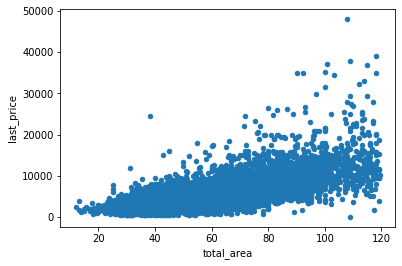

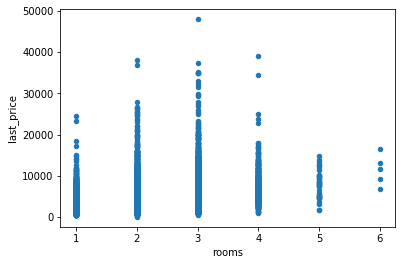

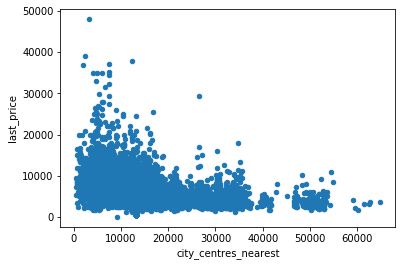

In [36]:
for col in ['total_area', 'rooms', 'city_centres_nearest']:
    good_data.plot(y='last_price', x=col, kind='scatter')
    plt.show()

Изучим зависимость цены от площади, числа комнат, удалённости от центра. Наблюдается высокая прямая зависимость между стоимость и общей площадью квартиры, количеством комнат.
Обратная пропорциональность между стоимостью с расстоянием от центра города.

In [37]:
good_data.pivot_table(index='floor_cat', values='last_price', aggfunc=('mean', 'median', 'max'))

,max,mean,median
floor_cat,,,
Другой,48000.0,5178.446255,4500.0
Первый,31500.0,4004.164384,3670.0
Последний,39000.0,4613.988031,3990.0


Изучим зависимость между стоимостью, этажом жилого помещения (первый, последний, другой). На первых этажах стоимость аметно ниже, чем в других категориях. Дороже всего продаются квартиры на этажах из категории "другой"

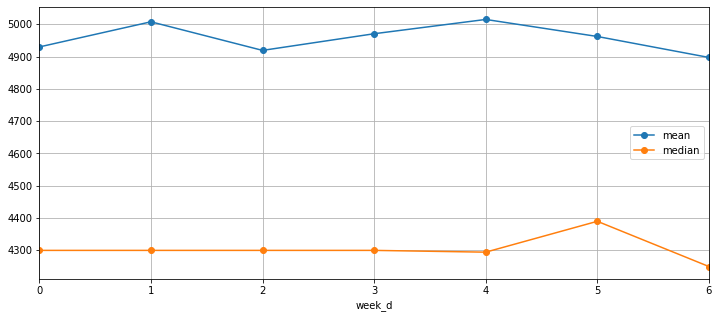

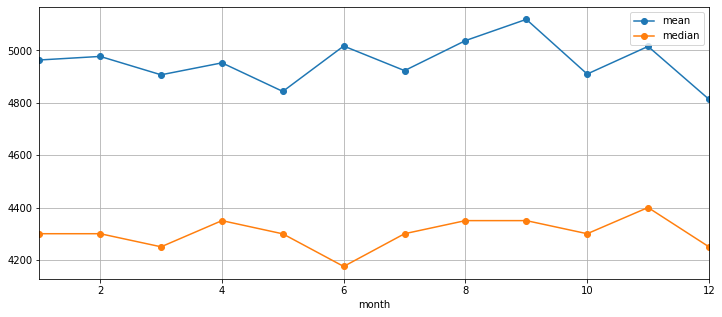

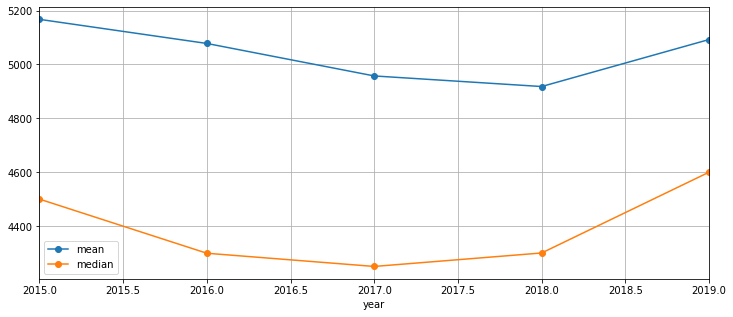

In [38]:
good_data.pivot_table(index='week_d', values='last_price', aggfunc=('mean', 'median')).plot(style='o-', grid=True, figsize=(12,5))
good_data.pivot_table(index='month', values='last_price', aggfunc=('mean', 'median')).plot(style='o-', grid=True, figsize=(12,5))
good_data.pivot_table(index='year', values='last_price', aggfunc=('mean', 'median')).plot(style='o-', grid=True, figsize=(12,5))

Изучим зависимость между стоимостью и датой размещения. По дням почти нет никаких изменений по сравнению с другими днями недели, кроме субботы. По месяцам следыющие выводы: наивысший показатель стоимости жилплощади - апрель, август и ноябрь, наихудший - в марте, июне, октябре и декабре. По годам падение средней цены с 2015 по 2018 г. и её последующим ростом.

In [39]:
top_10_locality = good_data.groupby('locality_name')['locality_name'].count().sort_values(ascending=False).head(10)
top_10_good_data = good_data.query('locality_name in @top_10_locality.index')
pivot_top_10_good_data = top_10_good_data.pivot_table(index='locality_name', values='price_m3', aggfunc=('mean', 'median')).sort_values('mean', ascending=False)
pivot_top_10_good_data

,mean,median
locality_name,,
Санкт-Петербург,107214.302757,101983.0
Пушкин,100938.151394,97625.0
Кудрово,94623.050891,95052.0
Парголово,89282.152416,91237.0
Мурино,86058.944334,86268.0
Шушары,78057.530055,76220.0
Колпино,74788.952030,73529.0
Всеволожск,69005.045775,65789.0
Гатчина,68307.550661,67187.0


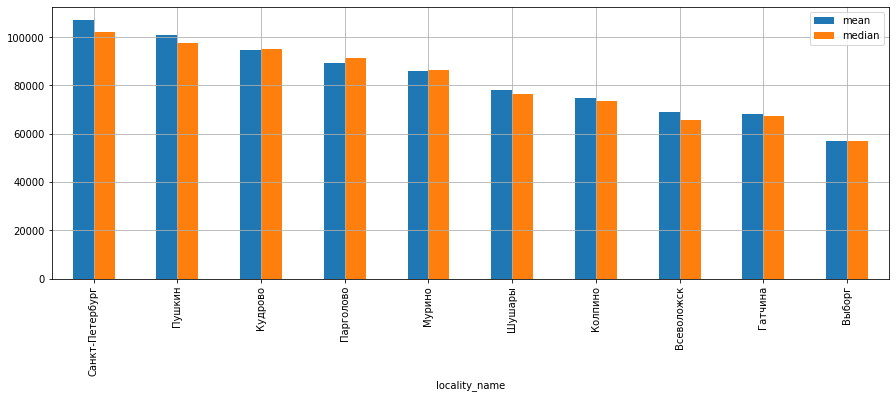

In [40]:
pivot_top_10_good_data.plot(figsize=(15,5), kind='bar', grid=True)

Рассмотрим среднюю цену за кв.м в 10 населённых пунктах с наибольшим числом объявлений. Самый дорогой квадратный метр в Сантк-Петербурге, наименее - в Выборге

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


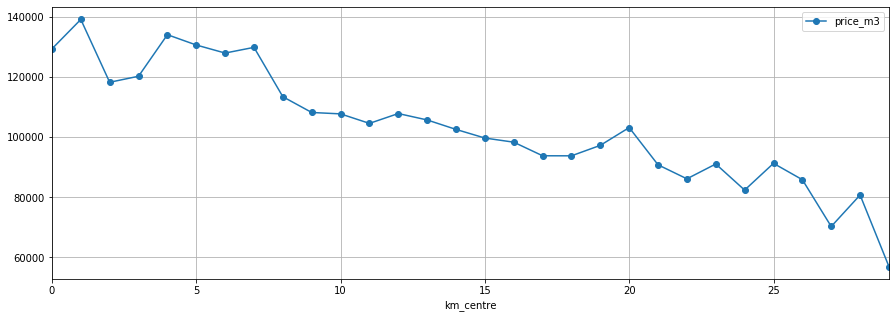

In [41]:
spb_good_data = good_data.query('locality_name == "Санкт-Петербург"')
spb_good_data['km_centre'] = spb_good_data['city_centres_nearest']/1000
spb_good_data['km_centre'] = spb_good_data['km_centre'].astype('int64')
spb_good_data_pivot = spb_good_data.pivot_table(index='km_centre', values='price_m3', aggfunc='mean')
spb_good_data_pivot.plot(grid=True, style='o-', figsize=(15,5))

Рассмотрим как цена за кв.м реагирует на увеличение расстояния от центра города. Найдем условный центр (его границу). Падение на отметке в 2-3 км может быть выбросом в данных, лучше взять отметку в 7-8 км

In [42]:
spb_centre_good_data = spb_good_data.query('km_centre <= 8')

Выделим сегмент квартир в центре, изучим его по параметрам: цена, площадь, число комнат, высота потолков. 

count    1997.000000
mean       64.031522
std        22.974145
min        12.000000
25%        45.100000
50%        61.000000
75%        80.500000
max       119.000000
Name: total_area, dtype: float64

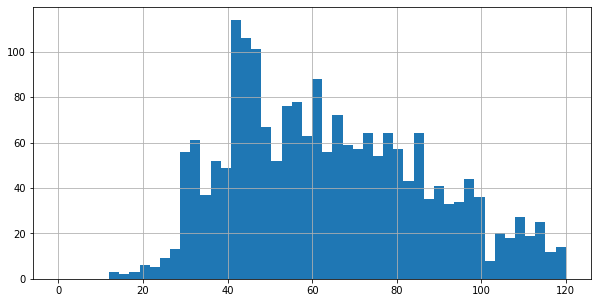

In [43]:
spb_centre_good_data['total_area'].hist(bins=50, figsize=(10,5), range=(0,120))
spb_centre_good_data['total_area'].describe()

Распределение нормальное, в основном площадь составляет 40-80 кв.м

count     1997.000000
mean      8109.021574
std       4557.462736
min       1600.000000
25%       5200.000000
50%       6990.000000
75%       9520.000000
max      48000.000000
Name: last_price, dtype: float64

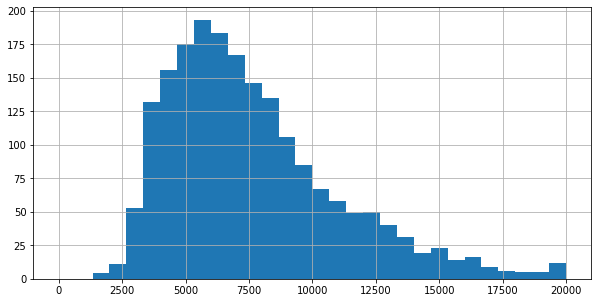

In [44]:
spb_centre_good_data['last_price'].hist(bins=30, figsize=(10,5), range=(0,20000))
spb_centre_good_data['last_price'].describe()

В основном жилплощадь отдают по стоимсоти от 3 до 8 млн

count    1997.000000
mean        2.210816
std         0.927277
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         6.000000
Name: rooms, dtype: float64

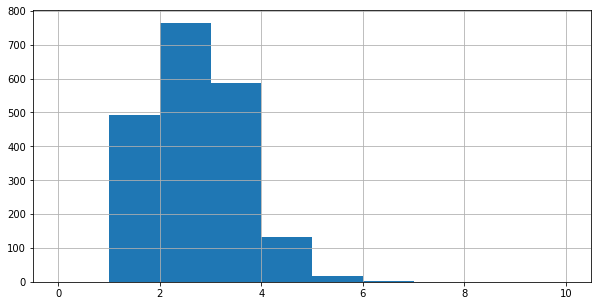

In [45]:
spb_centre_good_data['rooms'].hist(bins=10, figsize=(10,5), range=(0,10))
spb_centre_good_data['rooms'].describe()

Продаются в основном квартиры 2-4 комнаты

count    1997.000000
mean        2.752278
std         0.181922
min         2.400000
25%         2.550000
50%         2.750000
75%         3.000000
max         3.000000
Name: ceiling_height, dtype: float64

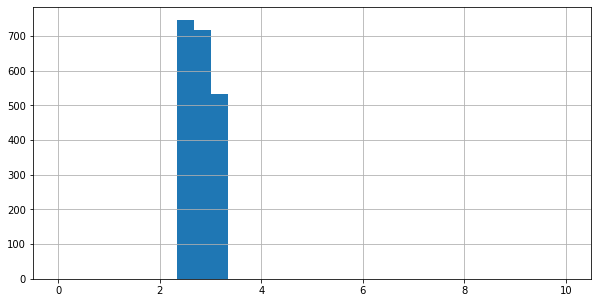

In [46]:
spb_centre_good_data['ceiling_height'].hist(bins=30, figsize=(10,5), range=(0,10))
spb_centre_good_data['ceiling_height'].describe()

2,5 метра потолки наиболее часто встречаются

In [47]:
spb_centre_good_data[['last_price', 'days_exposition', 'rooms', 'city_centres_nearest', 'ceiling_height']].corr()

,last_price,days_exposition,rooms,city_centres_nearest,ceiling_height
last_price,1.000000,0.110812,0.380946,-0.151414,0.174781
days_exposition,0.110812,1.000000,0.108261,-0.054424,0.046787
rooms,0.380946,0.108261,1.000000,-0.191972,0.163853
city_centres_nearest,-0.151414,-0.054424,-0.191972,1.000000,-0.216619
ceiling_height,0.174781,0.046787,0.163853,-0.216619,1.000000


In [48]:
outer_spb_good_data = spb_good_data.query('km_centre > 8')
outer_spb_good_data[['last_price', 'days_exposition', 'rooms', 'city_centres_nearest', 'ceiling_height']].corr()

,last_price,days_exposition,rooms,city_centres_nearest,ceiling_height
last_price,1.000000,0.080955,0.474802,-0.118042,0.335937
days_exposition,0.080955,1.000000,0.066863,0.010332,0.057437
rooms,0.474802,0.066863,1.000000,-0.036889,-0.101389
city_centres_nearest,-0.118042,0.010332,-0.036889,1.000000,0.018750
ceiling_height,0.335937,0.057437,-0.101389,0.018750,1.000000


Чувствительность цены к удалению от центра города незначительна в центре города, присутствует ощутимая корреляция с продолжительностью размещения объявления для центра города. Цена меньше реагируют на увеличение числа комнат в центре города, чем за пределами центра. Хорошая корреляция с высотностью потолков, более выражена за пределами центра города.

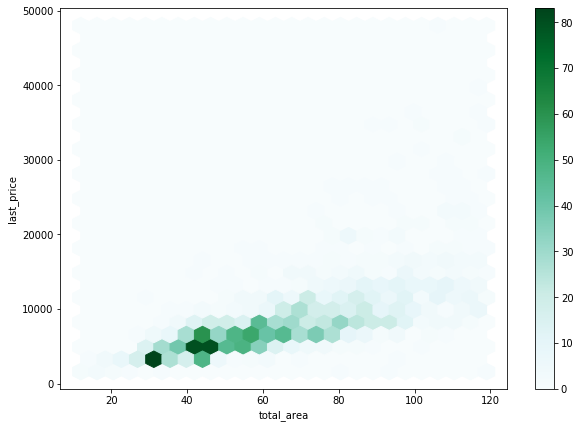

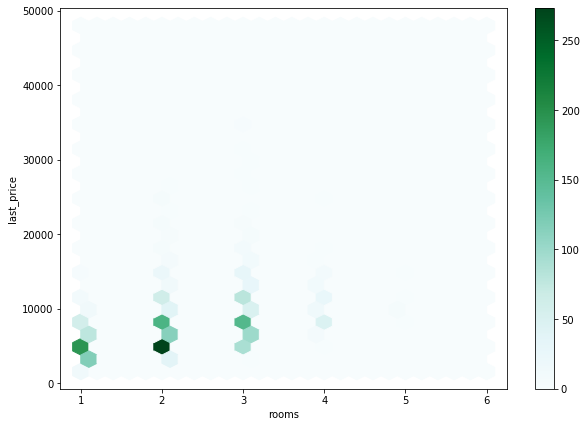

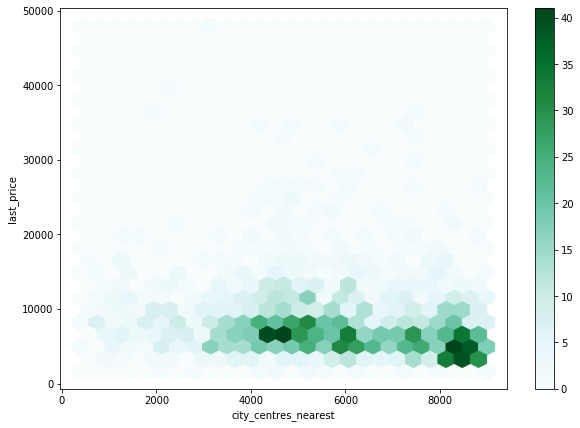

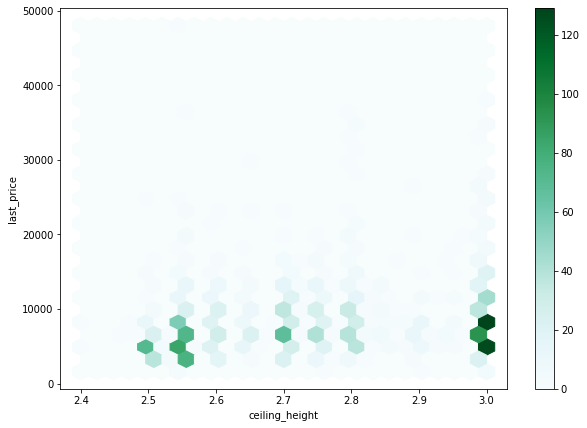

In [49]:
for col in ['total_area', 'rooms', 'city_centres_nearest', 'ceiling_height']:
    spb_centre_plot = spb_centre_good_data.plot(y='last_price', x=col, kind='hexbin', gridsize=25, sharex=False, figsize=(10,7))
    plt.show()

График зависимости стоимости от расстояния от центра города показывает, что стоимость фактически не реагирует на увеличение расстояния. Также она слабо реагирует на увеличение числа комнат, больше находясь в прямой зависимости от общей площади. Потолки заметного влияния на стоимость также не оказывают.

In [50]:
spb_centre_good_data.pivot_table(index='floor_cat', values='last_price', aggfunc=('mean', 'median', 'max'))

,max,mean,median
floor_cat,,,
Другой,48000.0,8430.225059,7360.0
Первый,31500.0,6237.731745,5400.0
Последний,39000.0,8060.924881,7000.0


In [51]:
outer_spb_good_data.pivot_table(index='floor_cat', values='last_price', aggfunc=('mean', 'median', 'max'))

,max,mean,median
floor_cat,,,
Другой,38000.0,5443.487283,4800.0
Первый,21600.0,4604.130973,4200.0
Последний,18500.0,5012.916267,4400.0


Тенденция совпадает - дороже продается квартира на этажаъ из категории "другой", потом идет последний этаж, дешевле всего - первый этаж

## Общий вывод

В центре Санкт-Петербурга (с границей 7-8 км) представлены на продажу более просторные квартиры с высокими потолками (до 3 метров), чем по всему городу. Далее стоимость квартиры падает (после 7-8км). Квартиры на первых этажах продаются дешевле, чем на последних или "других". Число комнат влияет на стоимость квартиры (в сторону роста) до значения "3" включительно. Чем дольше продается квартира по, тем выше цена - правило работает больше для центра города. Таким образом, основными факторами, которые влияют на формирование стоимости - число комнат, этаж, удаленность от центра, высота потолков, продолжительность размещения объявления.